In [40]:
from __future__ import print_function 
%cd /Users/sophiatonelli/library_script/script
from scipy.ndimage import gaussian_filter1d
import tools21cm as t2c
import os, sys 
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar
import math
from scipy.stats import gaussian_kde
os.chdir('/Users/sophiatonelli/library_script/script/work')
sys.path.append(os.getcwd())
import script
sys.path.append(os.getcwd())
import numpy as np 
import matplotlib.pyplot as plt 
import script 
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11})

/Users/sophiatonelli/library_script/script


In [41]:

gadget_snap = '/Users/sophiatonelli/Downloads/snap_120' 
outpath = '/Users/sophiatonelli/library_script/script/work/script_files' 
scaledist = 1e-3 
default_simulation_data = script.default_simulation_data(gadget_snap, outpath, sigma_8=0.829, ns=0.961, omega_b=0.0482, scaledist=scaledist) 

print("Simulation box size:", default_simulation_data.box, "cMpc/h") 
print("Simulation redshift:", default_simulation_data.z)



Simulation box size: 256.0 cMpc/h
Simulation redshift: 8.0


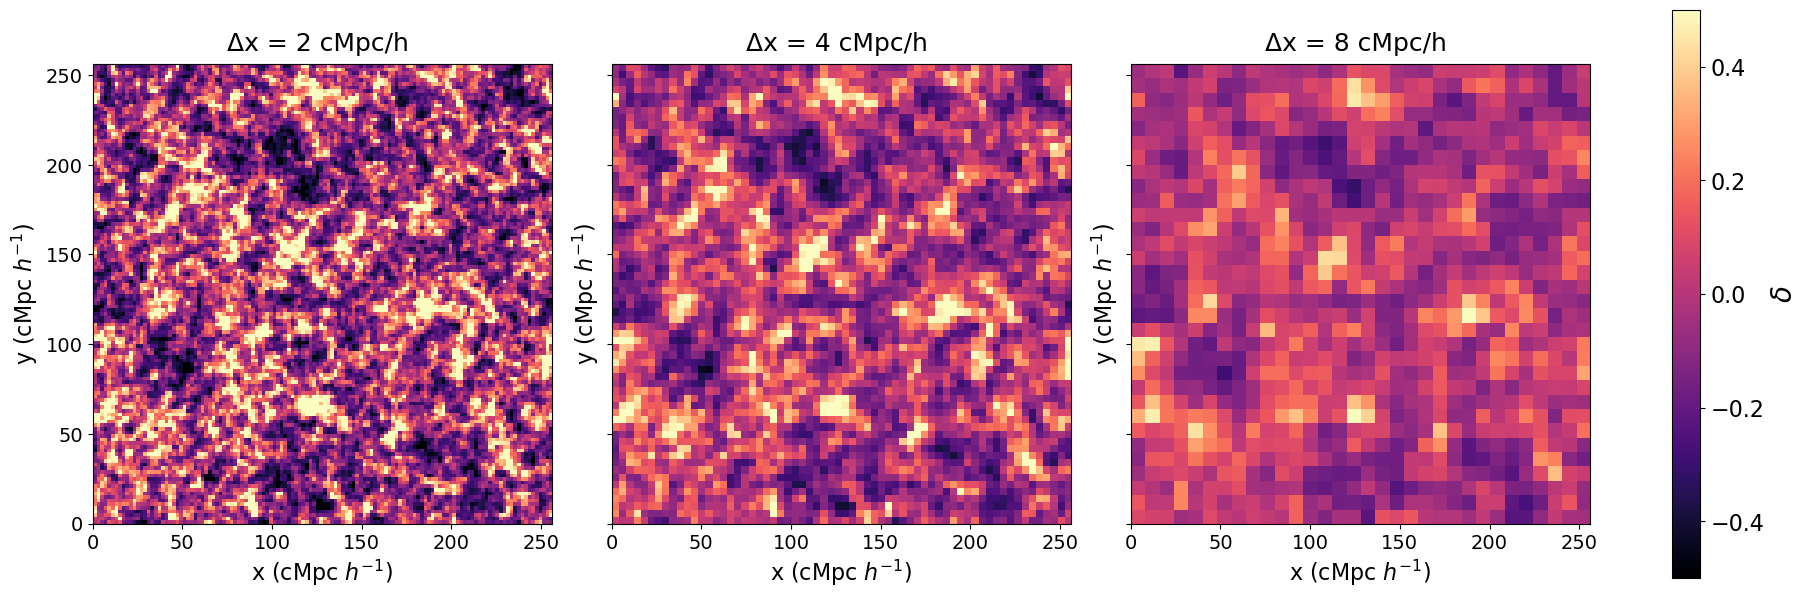

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)
ngrids_list = [128, 64, 32]
labels = ['Δx = 2 cMpc/h ', 'Δx = 4 cMpc/h ', 'Δx = 8 cMpc/h ']
zeta_pc = 25.08
threshold = 0.5
log10Mmin = 9.0
xhi_target = 0.50

for idx, ngrid in enumerate(ngrids_list):
    #np.random.seed(42)  # for reproducibility
    matter_fields = script.matter_fields(default_simulation_data, ngrid, outpath, overwrite_files=False) 
    delta = matter_fields.densitycontr_arr
    ax = axs[idx]
    im_q = ax.imshow(delta[:,:,int(0.5*ngrid)], extent=[0, default_simulation_data.box, 0, default_simulation_data.box], cmap='magma', vmin=-0.5, vmax=0.5)
    ax.set_title(labels[idx], fontsize=18, pad=10)  
    ax.set_xlabel(r'x (cMpc $h^{-1}$)', fontsize=16)
    ax.set_ylabel(r'y (cMpc $h^{-1}$)', fontsize=16) 
    ax.tick_params(labelsize=14)
    ax.set_xlim(0, default_simulation_data.box)
    ax.set_ylim(0, default_simulation_data.box) 
    ax.grid(False)

#single colorbar with space below the axes
cbar = fig.colorbar(im_q, ax=axs, orientation='vertical', fraction=0.02, label=r'$\delta$')
cbar.ax.yaxis.label.set_size(20)
cbar.ax.tick_params(labelsize=16)
plt.show()



#fcoll_arr = matter_fields.get_fcoll_for_Mmin(log10Mmin) 

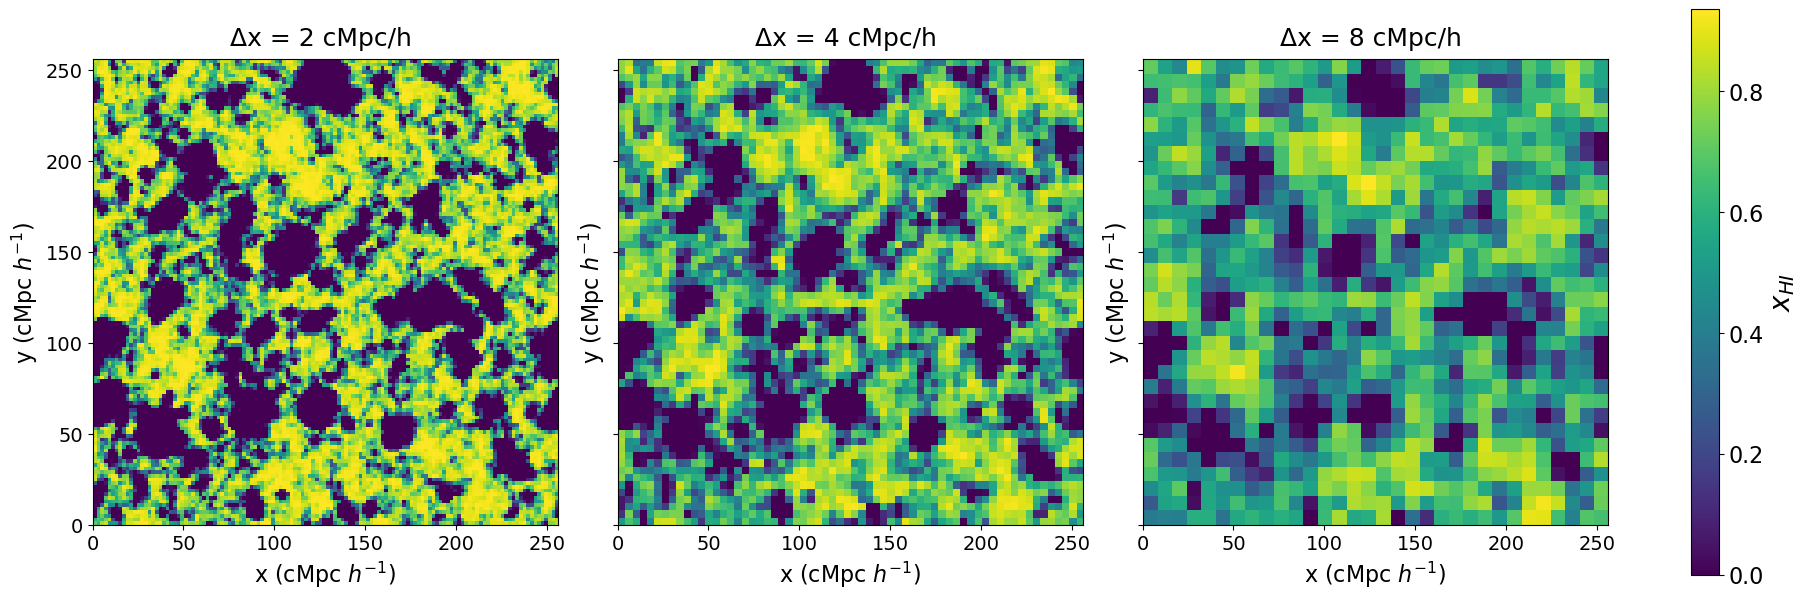

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)
ngrids_list = [128, 64, 32]
labels = ['Δx = 2 cMpc/h ', 'Δx = 4 cMpc/h ', 'Δx = 8 cMpc/h ']
zeta_pc = 25.08
threshold = 0.5
log10Mmin = 9.0
xhi_target = 0.50

for idx, ngrid in enumerate(ngrids_list):
    #np.random.seed(42)  #for reproducibility
    matter_fields = script.matter_fields(default_simulation_data, ngrid, outpath, overwrite_files=False) 
    ionization_map = script.ionization_map(matter_fields)
    fcoll_arr = matter_fields.get_fcoll_for_Mmin(log10Mmin)
    qi_arr = ionization_map.get_qi(zeta_pc * fcoll_arr)
    
    ax = axs[idx]
    im_q = ax.imshow(1 - qi_arr[:,:,int(0.5 * ngrid)], extent=[0, default_simulation_data.box, 0, default_simulation_data.box], cmap='viridis')
    ax.set_title(labels[idx], fontsize=18, pad=10)  
    ax.set_xlabel(r'x (cMpc $h^{-1}$)', fontsize=16)
    ax.set_ylabel(r'y (cMpc $h^{-1}$)', fontsize=16) 
    ax.tick_params(labelsize=14)
    ax.set_xlim(0, default_simulation_data.box)
    ax.set_ylim(0, default_simulation_data.box) 
    ax.grid(False)

#single colorbar with space below the axes
cbar = fig.colorbar(im_q, ax=axs, orientation='vertical', fraction=0.02, label=rf'$x_{{HI}}$')
cbar.ax.yaxis.label.set_size(20)
cbar.ax.tick_params(labelsize=16)
plt.show()